In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Housing.csv')
print("Dataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Summary Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.00

In [3]:

df.dropna(inplace=True)

In [4]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [5]:
# Print the column names
print("Column names:", df.columns.tolist())


Column names: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [6]:
columns_to_check = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
zero_counts = (df[columns_to_check] == 0).sum()


print("Number of zero values in each column:")
print(zero_counts)

Number of zero values in each column:
price                 0
area                  0
bedrooms              0
bathrooms             0
stories               0
mainroad              0
guestroom             0
basement              0
hotwaterheating       0
airconditioning       0
parking             299
prefarea              0
furnishingstatus      0
dtype: int64


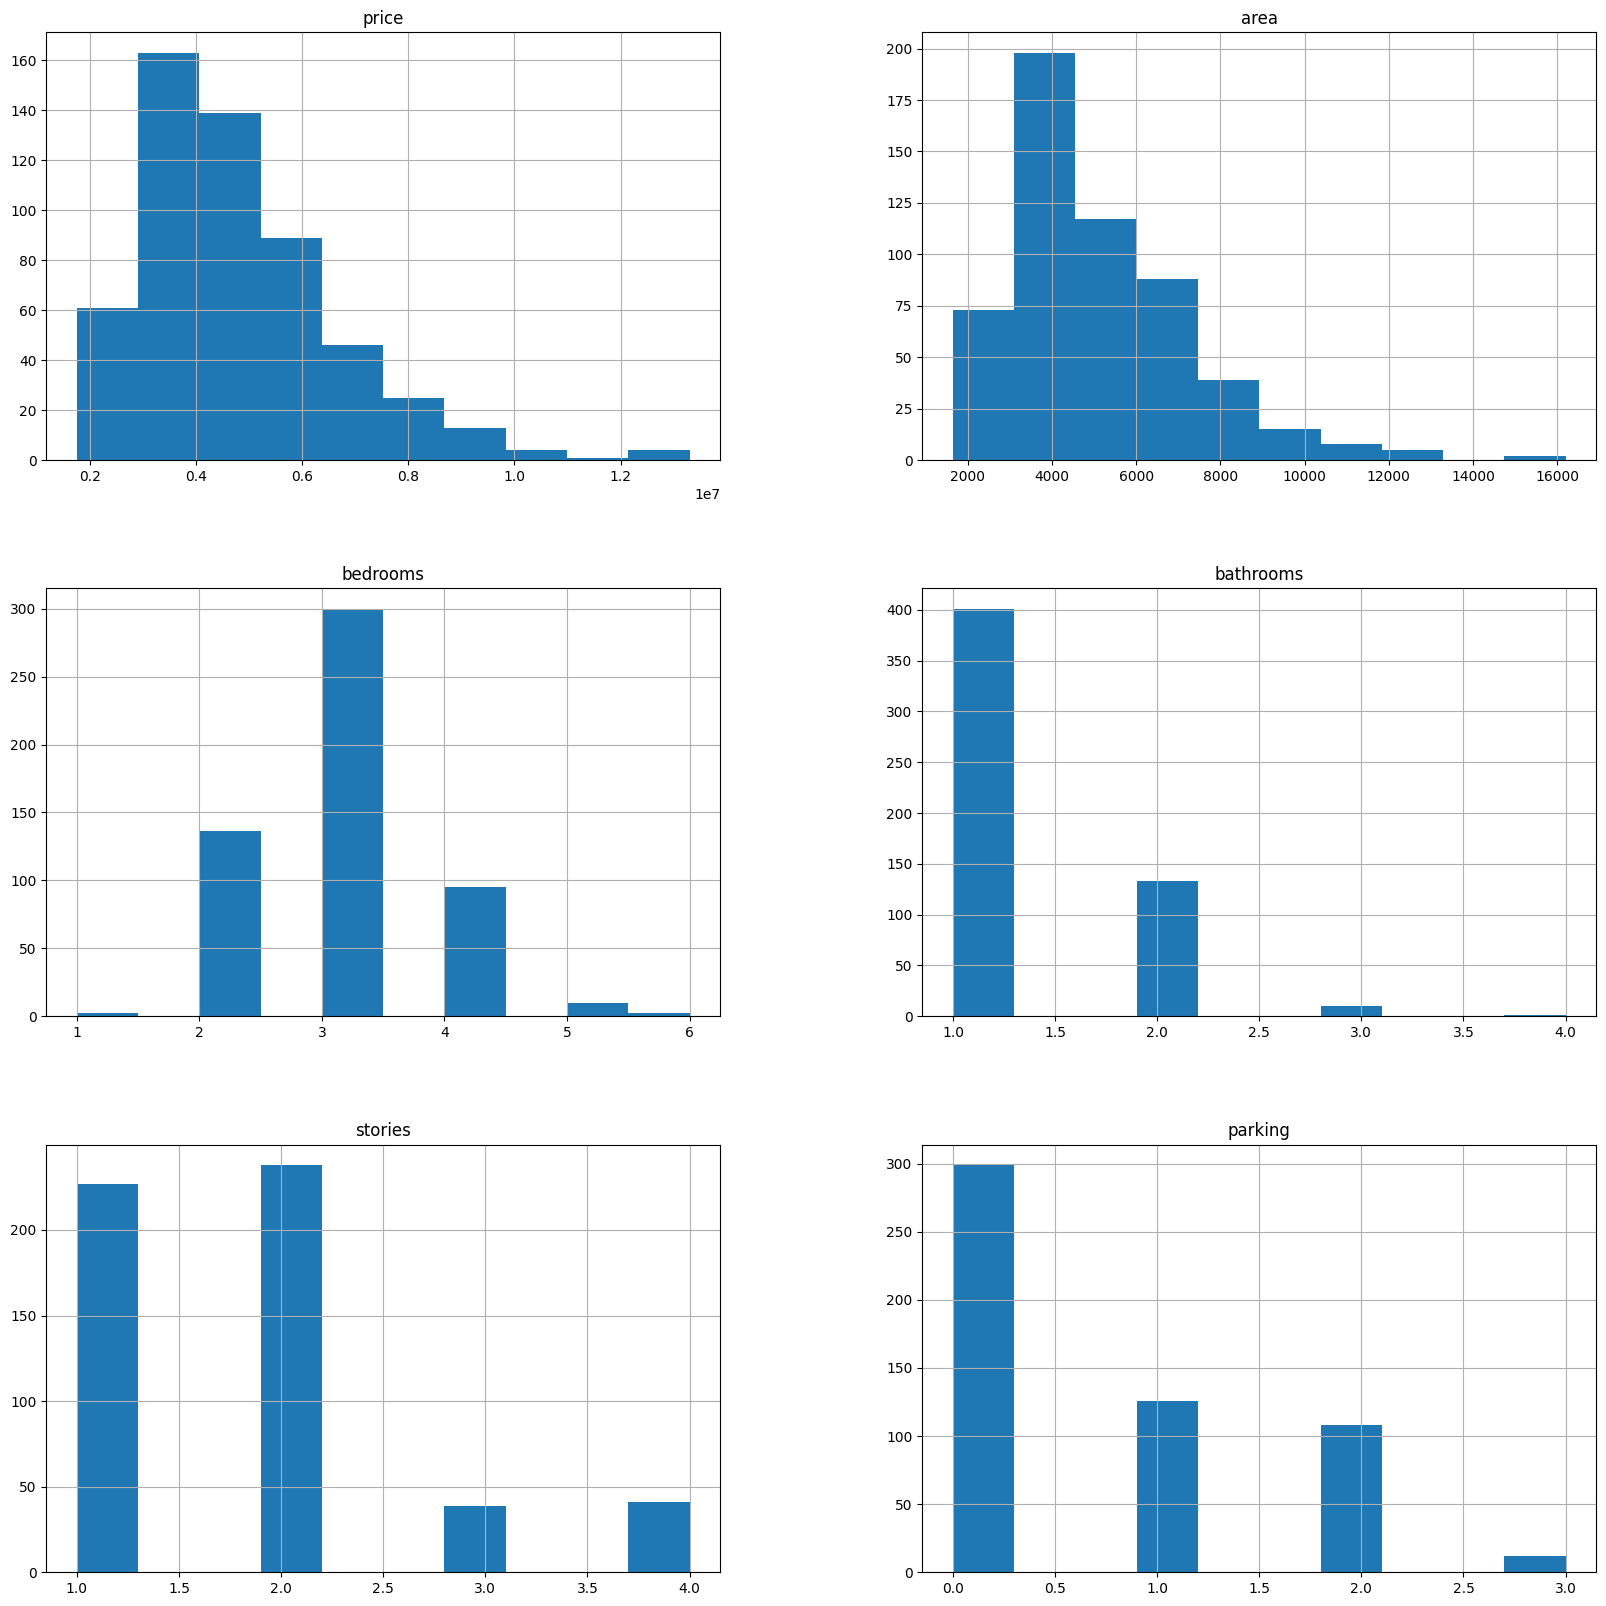

In [7]:
p = df.hist(figsize=(20, 20))

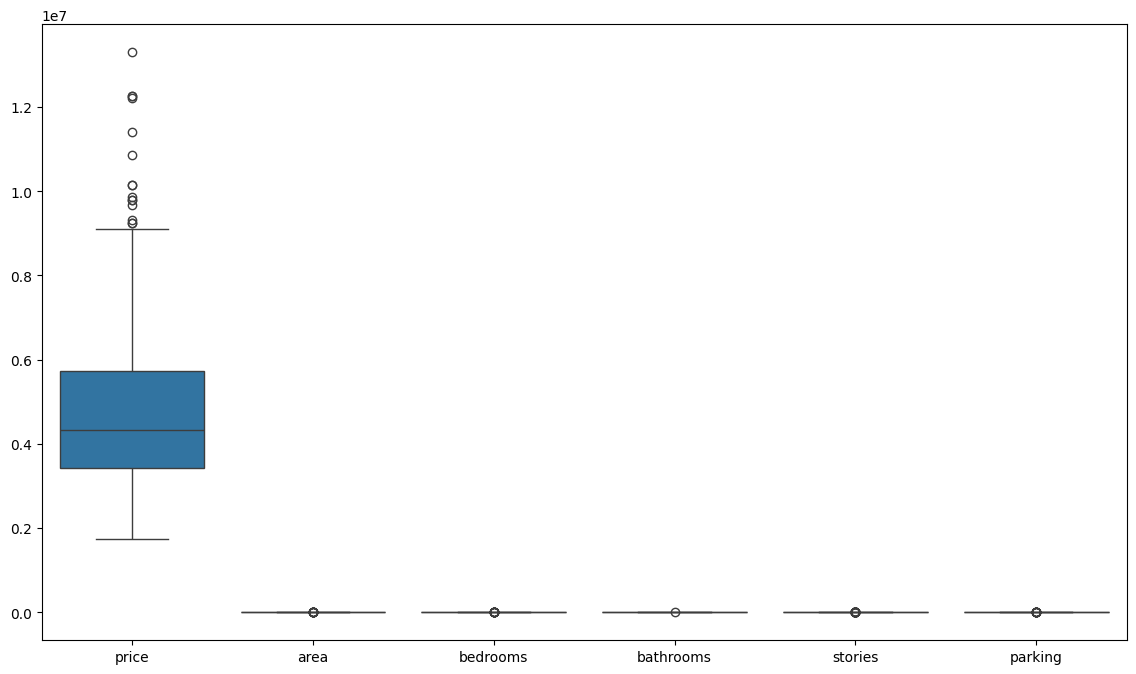

In [8]:
# Box Plots for numerical variables
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
plt.show()


In [9]:
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoding_col = ['furnishingstatus','prefarea','airconditioning','hotwaterheating','basement','guestroom','mainroad']
for col in encoding_col:
    df[col]=encoder.fit_transform(df[col])



In [11]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


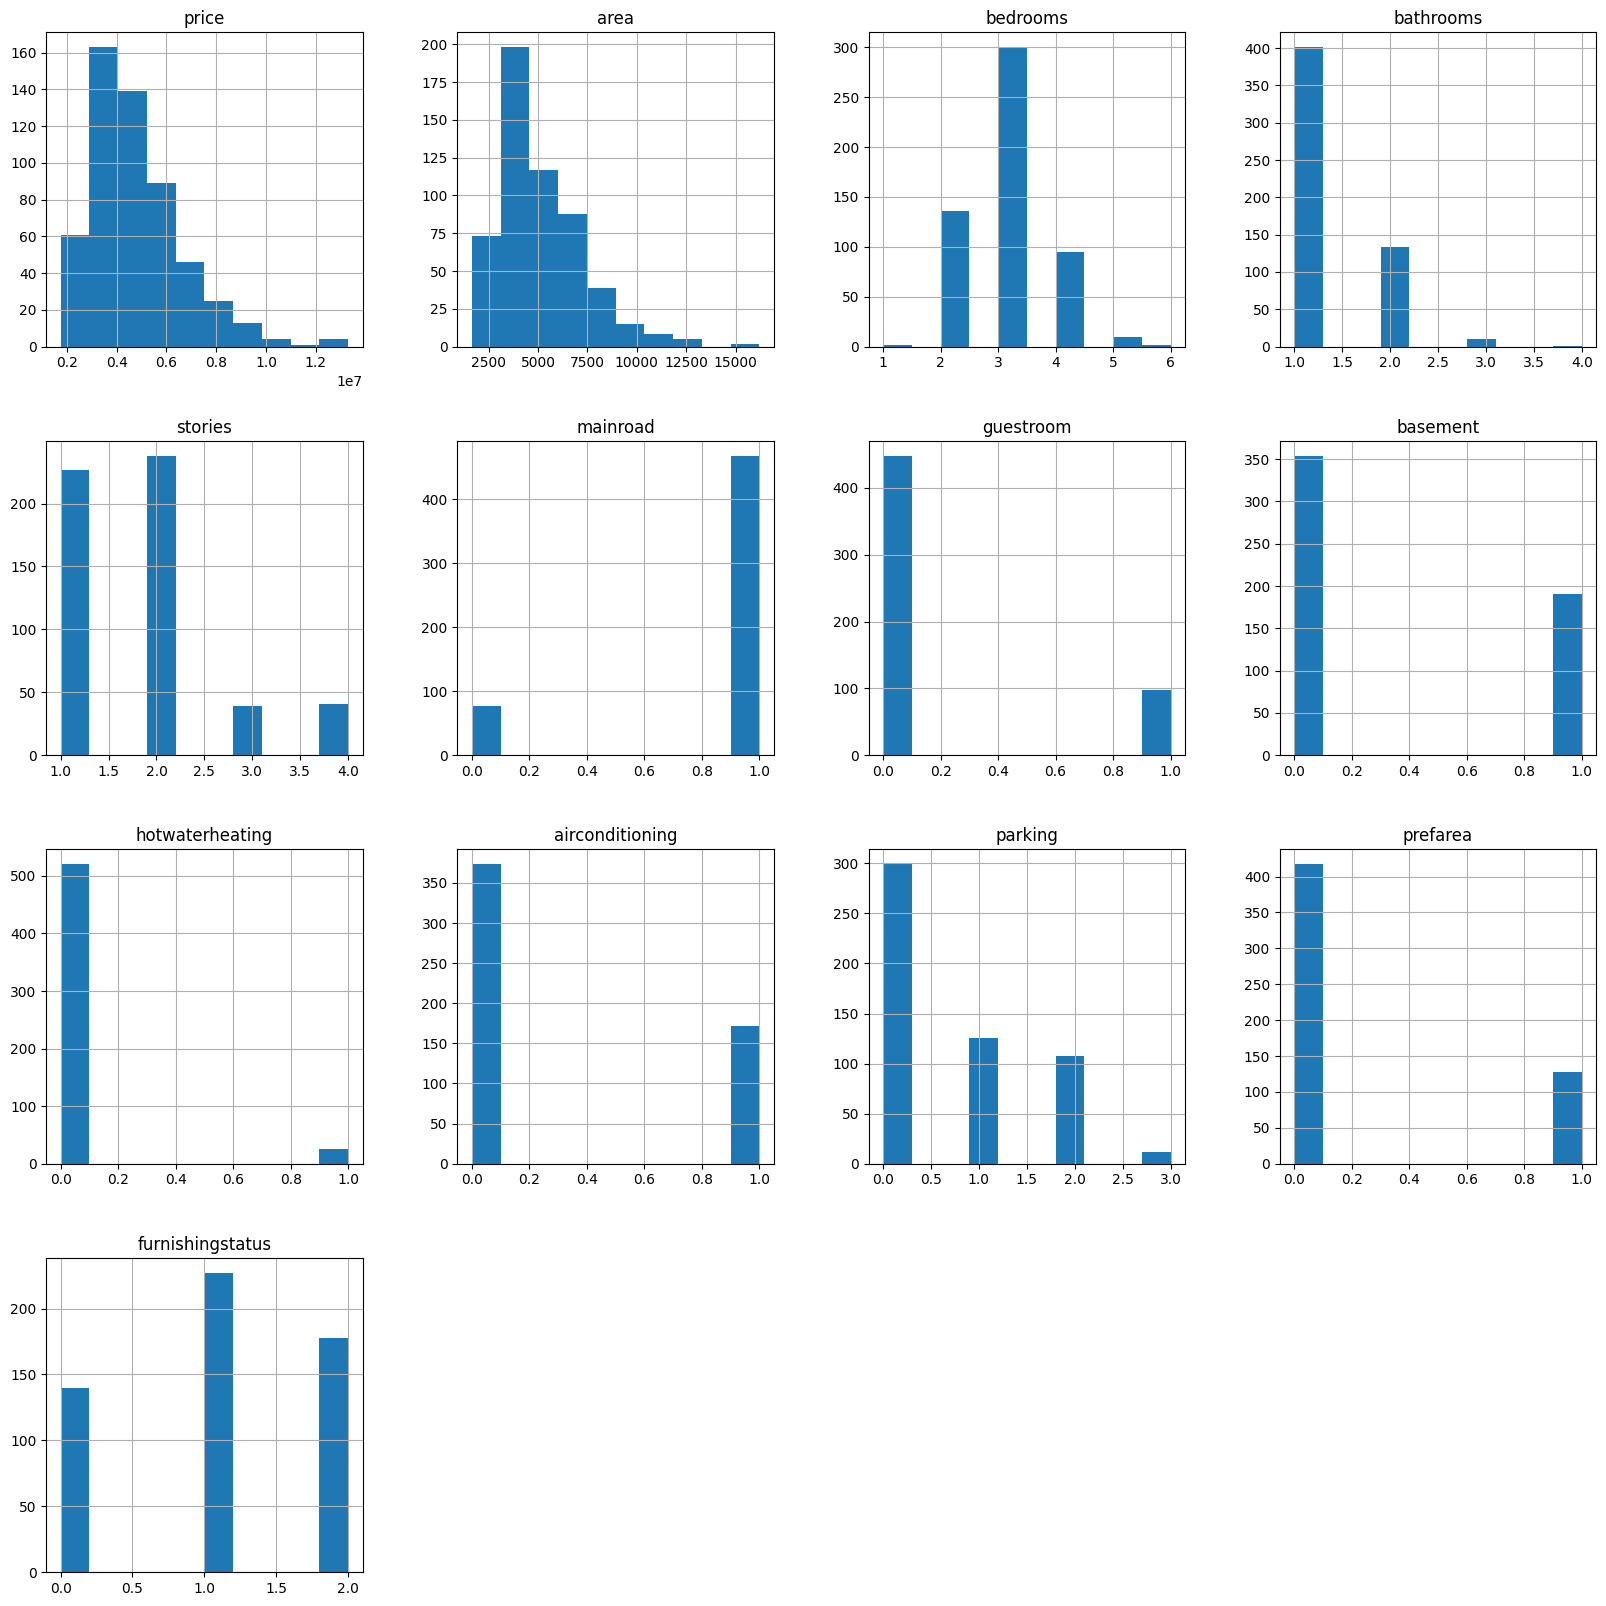

In [12]:
q = df.hist(figsize=(20, 20))

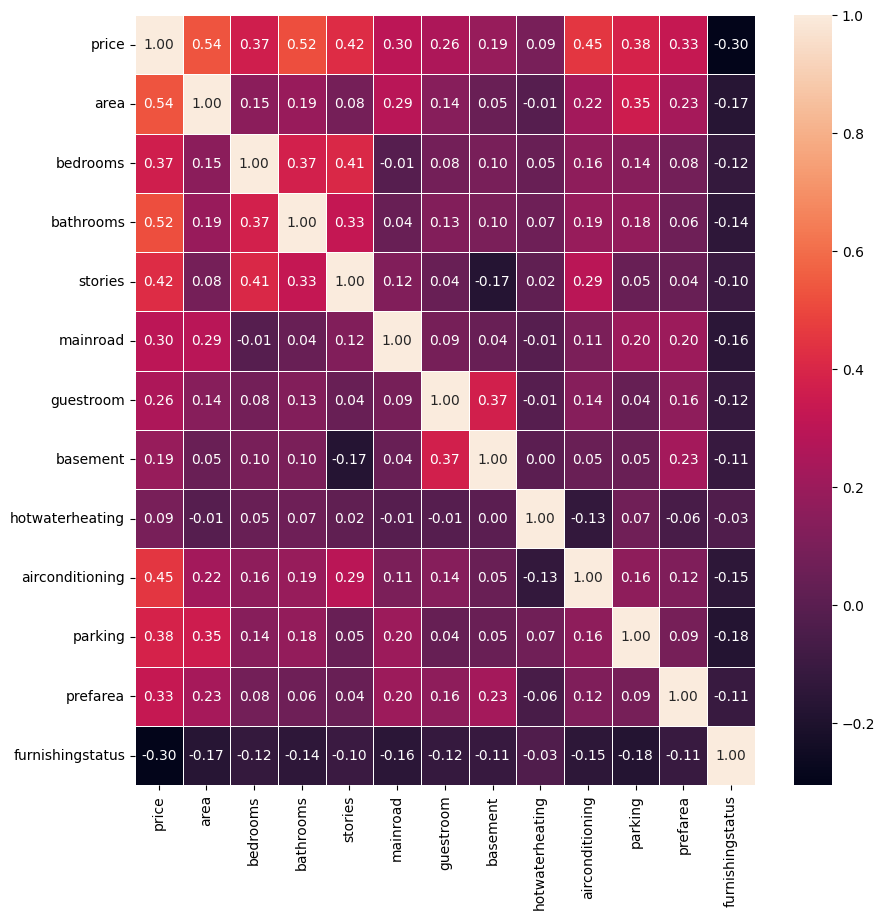

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.show()

In [21]:
x=df.drop(columns=['price'],axis = 1)
# x = df[['area', 'bedrooms', 'bathrooms', 'stories', 'airconditioning', 'parking']]  #did feature engineering by selecting from corr table
y=df['price']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
ln_model = LinearRegression()
ln_model.fit(x_train, y_train)
y_pred = ln_model.predict(x_test)
ln_acc = r2_score(y_test, y_pred)
print("r2 value is :", ln_acc)

#print mse and rmse
print("mse value is :" ,mean_squared_error(y_test, y_pred))
print("rmse value is :",np.sqrt(mean_squared_error(y_test, y_pred)))


r2 value is : 0.7624579467323475
mse value is : 0.006055724882518719
rmse value is : 0.07781853816744902


In [24]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
rf_acc = r2_score(y_test, y_pred)
print("r2 value is :", rf_acc)

#print mse and rmse
print("mse value is :" ,mean_squared_error(y_test, y_pred))
print("rmse value is :",np.sqrt(mean_squared_error(y_test, y_pred)))


r2 value is : 0.16792757730083419
mse value is : 0.021212251072526764
rmse value is : 0.1456442620652347


In [25]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

svr_model = SVR()
svr_model.fit(x_train, y_train.ravel()) # Use ravel() to flatten y_train
y_pred = svr_model.predict(x_test)
svr_acc = r2_score(y_test, y_pred)
print("r2 value is :", svr_acc)

# Print MSE and RMSE
print("mse value is :", mean_squared_error(y_test, y_pred))
print("rmse value is :", np.sqrt(mean_squared_error(y_test, y_pred)))

r2 value is : 0.6793891869548403
mse value is : 0.00817341961751292
rmse value is : 0.09040696664258192


In [26]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

abr_model = AdaBoostRegressor()
abr_model.fit(x_train, y_train.ravel()) # Use ravel() to flatten y_train
y_pred = abr_model.predict(x_test)
abr_acc = r2_score(y_test, y_pred)
print("r2 value is :", abr_acc)

# Print MSE and RMSE
print("mse value is :", mean_squared_error(y_test, y_pred))
print("rmse value is :", np.sqrt(mean_squared_error(y_test, y_pred)))

r2 value is : 0.6307781620592181
mse value is : 0.009412673842083703
rmse value is : 0.09701893548211969


In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

gbc_model = GradientBoostingRegressor()
gbc_model.fit(x_train, y_train.ravel())  # Use ravel() to flatten y_train
y_pred = gbc_model.predict(x_test)
gbc_acc = r2_score(y_test, y_pred)
print("r2 value is :", gbc_acc)

# Print MSE and RMSE
print("mse value is :", mean_squared_error(y_test, y_pred))
print("rmse value is :", np.sqrt(mean_squared_error(y_test, y_pred)))

r2 value is : 0.6806008207559695
mse value is : 0.008142531103849484
rmse value is : 0.09023597455477214


Dataset source

In [28]:
#i have compared performance before and after feature engineering , better to not do feature engineering

In [ ]:
link to dataset - https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction/data


Report on the project

In [ ]:
'''
Overview
This project focuses on predicting housing prices using various machine learning models. The dataset used contains features such as area, number of bedrooms, bathrooms, stories, and other amenities. The goal is to build and compare the performance of different regression models to predict housing prices accurately.

Key Features-
Exploratory Data Analysis (EDA):
Summary statistics and null value checks.
Analysis of zero values in key columns to handle missing or invalid data effectively.
Histograms and boxplots to visualize the distribution of numerical features.
Heatmaps to explore correlations between features and the target variable (price).

Data Preprocessing-
Handling missing values by dropping rows with null entries.
Encoding categorical variables using Label Encoding for model compatibility.
Scaling numerical features using MinMaxScaler to normalize the data.

Machine Learning Models-
Linear Regression: A baseline model for regression tasks.
Decision Tree Regressor: A tree-based model for capturing non-linear relationships.
Support Vector Regressor (SVR): Utilizes the RBF kernel for enhanced performance.
AdaBoost Regressor: An ensemble method to improve prediction accuracy.
Gradient Boosting Regressor: A high-performance gradient-boosting algorithm for regression.

Performance Metrics-
The performance of each model was evaluated using the following metrics:
R² Score: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
Mean Squared Error (MSE): Measures the average squared difference between the actual and predicted values.
Root Mean Squared Error (RMSE): The square root of MSE, providing a measure of the differences between predicted and actual values.

Conclusion-
Linear Regression performed the best among all models with an R² score of 0.7625.
Decision Tree Regressor had the lowest performance with an R² score of 0.1940.

Feature engineering was attempted but did not improve the model performance significantly, so it was omitted in the final analysis.

Future Works-
Include cross-validation and hyperparameter tuning to optimize model performance.
Explore the use of neural networks for regression tasks.
Evaluate the impact of outlier handling and data balancing techniques on model accuracy.
Use the PyCaret library to automate the process of comparing multiple machine learning models and selecting the best-performing one.

'''